https://www.kaggle.com/uciml/sms-spam-collection-dataset

https://www.kaggle.com/karthickveerakumar/spam-filter

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle
from IPython.display import clear_output

In [2]:
pd.options.display.max_colwidth = -1
%matplotlib inline

# Data

In [3]:
data1 = pd.read_csv('emails.csv')
data2 = pd.read_csv('sms.csv')

In [4]:
data1.head()

,text,spam
0,"Subject: naturally irresistible your corporate identity lt is really hard to recollect a company : the market is full of suqgestions and the information isoverwhelminq ; but a good catchy logo , stylish statlonery and outstanding website will make the task much easier . we do not promise that havinq ordered a iogo your company will automaticaily become a world ieader : it isguite ciear that without good products , effective business organization and practicable aim it will be hotat nowadays market ; but we do promise that your marketing efforts will become much more effective . here is the list of clear benefits : creativeness : hand - made , original logos , specially done to reflect your distinctive company image . convenience : logo and stationery are provided in all formats ; easy - to - use content management system letsyou change your website content and even its structure . promptness : you will see logo drafts within three business days . affordability : your marketing break - through shouldn ' t make gaps in your budget . 100 % satisfaction guaranteed : we provide unlimited amount of changes with no extra fees for you to be surethat you will love the result of this collaboration . have a look at our portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ not interested . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _",1
1,Subject: the stock trading gunslinger fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no,1
2,"Subject: unbelievable new homes made easy im wanting to show you this homeowner you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate . this offer is being extended to you unconditionally and your credit is in no way a factor . to take advantage of this limited time opportunity all we ask is that you visit our website and complete the 1 minute post approval form look foward to hearing from you , dorcas pittman",1
3,"Subject: 4 color printing special request additional information now ! click here click here for a printable version of our order form ( pdf format ) phone : ( 626 ) 338 - 8090 fax : ( 626 ) 338 - 8102 e - mail : ramsey @ goldengraphix . com request additional information now ! click here click here for a printable version of our order form ( pdf format ) golden graphix & printing 5110 azusa canyon rd . irwindale , ca 91706 this e - mail message is an advertisement and / or solicitation .",1
4,"Subject: do not have money , get software cds from here ! software compatibility . . . . ain ' t it great ? grow old along with me the best is yet to be . all tradgedies are finish ' d by death . all comedies are ended by marriage .",1


In [5]:
data1.tail()

,text,spam
5723,"Subject: re : research and development charges to gpg here it is ! - - - - - - - - - - - - - - - - - - - - - - forwarded by shirley crenshaw / hou / ect on 08 / 14 / 2000 07 : 47 am - - - - - - - - - - - - - - - - - - - - - - - - - - - vince j kaminski 08 / 10 / 2000 02 : 25 pm to : vera apodaca / et & s / enron @ enron cc : vince j kaminski / hou / ect @ ect , shirley crenshaw / hou / ect @ ect , pinnamaneni krishnarao / hou / ect @ ect subject : re : research and development charges to gpg vera , we shall talk to the accounting group about the correction . vince 08 / 09 / 2000 03 : 26 pm vera apodaca @ enron vera apodaca @ enron vera apodaca @ enron 08 / 09 / 2000 03 : 26 pm 08 / 09 / 2000 03 : 26 pm to : pinnamaneni krishnarao / hou / ect @ ect cc : vince j kaminski / hou / ect @ ect subject : research and development charges to gpg per mail dated june 15 from kim watson , there was supposed to have occurred a true - up of $ 274 . 7 in july for the fist six months of 2000 . reviewing july actuals , i was not able to locate this entry . would you pls let me know whether this entry was made , if not , when do you intend to process it . thanks .",0
5724,"Subject: re : receipts from visit jim , thanks again for the invitation to visit lsu . shirley will fedex the receipts tomorrow . vince "" james r . garven "" on 02 / 08 / 2000 07 : 00 : 50 pm to : vince j kaminski cc : subject : receipts from visit dear vince , thanks again for taking the time to visit . ? both faculty and students got a lot out of your presentations . i have a favor to ask concerning the expense reimbursement process . ? can you mail all travel and lodging receipts to my secretary joan payne at the following address : joan payne department of finance 2163 ceba louisiana state university baton rouge , la ? 70803 thanks , jim garven james r . garven william h . wright , jr . endowed chair for financial services department of finance 2158 ceba e . j . ourso college of business administration louisiana state university baton rouge , la ? 70803 - 6308 voice ( 225 ) 388 - 0477 ? | ? fax : ( 800 ) 859 - 6361 e - mail : ? jgarven @ lsu . edu home page : http : / / garven . lsu . edu vita : http : / / garven . lsu . edu / dossier . html research paper archive : http : / / garven . lsu . edu / research . html",0
5725,"Subject: re : enron case study update wow ! all on the same day . that ' s super . thank you so very much . vince is coming up to baylor on monday of next week and we will hash out our question list then . thanks john at 04 : 54 pm 11 / 6 / 00 - 0600 , you wrote : > good afternoon john , > > i just want to drop you a line to update you re : andy fastow . i have > confirmed a one hour interview slot with mr . fastow in monday , december 4 th > from > 11 : 00 a . m . - noon . this is in addition to your schedule interviews with > mr . lay and mr . skilling - outline below . > > if you have any questions , please do not hesitate to contact me at > 713 - 853 - 5670 . > > regards , > > cindy > > > - - - - - forwarded by cindy derecskey / corp / enron on 11 / 06 / 2000 04 : 49 pm - - - - - > > cindy > derecskey to : "" john martin "" > cc : vince j kaminski / hou / ect @ ect , christie patrick / hou / ect @ ect > 10 / 31 / 2000 subject : re : enron case study ( document link : cindy derecskey ) > 01 : 44 pm > > > > > > good afternoon john , > > i hope things are well with you . i am writing to update you on the status > of your meetings with andy fastow , ken lay and jeff skilling . i have > arranged the following meeting dates and times with ken lay and jeff > skilling , ( i am still trying to work with andy fastow ' s schedule ) : > > jeff skilling > december 4 th > 2 : 00 - 3 : 00 p . m . > > ken lay > december 4 th > 3 : 30 - 4 : 30 p . m . > > also , i will attempt to schedule the meeting with andy fastow for december > 4 th for convenience - this will also allow us to possibly schedule > additional meetings for the 5 th ( as needed ) . i

In [6]:
data2.head()

,Unnamed: 0,label,message,length
0,0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111
1,1,ham,Ok lar... Joking wif u oni...,29
2,2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155
3,3,ham,U dun say so early hor... U c already then say...,49
4,4,ham,"Nah I don't think he goes to usf, he lives around here though",61


In [7]:
data2.tail()

,Unnamed: 0,label,message,length
5567,5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",160
5568,5568,ham,Will ü b going to esplanade fr home?,36
5569,5569,ham,"Pity, * was in mood for that. So...any other suggestions?",57
5570,5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,125
5571,5571,ham,Rofl. Its true to its name,26


## Integration

In [8]:
data = pd.DataFrame(columns=['Text', 'Spam'])

In [9]:
for i in range(len(data1)):
    print(i+1,'/5728')
    data = pd.concat([data, pd.DataFrame({
        'Text': [data1['text'][i].replace('Subject: ', '')],
        'Spam': [data1['spam'][i]]
    })])
    clear_output(wait=True)
for i in range(len(data2)):
    print(i+1,'/5571')
    data = pd.concat([data, pd.DataFrame({
        'Text': [data2['message'][i]],
        'Spam': [int(data2['label'][i] == 'spam')]
    })])
    clear_output(wait=True)

5572 /5571


0    4360
1    1368
Name: spam, dtype: int64
ham     4825
spam    747 
Name: label, dtype: int64
0    9185
1    2115
Name: Spam, dtype: int64


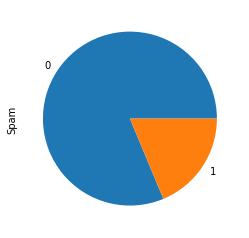

In [10]:
print(data1['spam'].value_counts())
print(data2['label'].value_counts())
print(data['Spam'].value_counts())
data['Spam'].value_counts().plot.pie()

# Text Cleaning

In [11]:
import nltk, re
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import langdetect

def spell_correct(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"what's", "what is ", text) 
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\0s", "0", text)    
    return text

def remove_url(text):
    URL_REGEX = re.compile(r'''((http[s]?://)[^ <>'"{}|\\^`[\]]*)''')
    return URL_REGEX.sub(r' ', text)

def remove_handles(text):
    HANDLES_REGEX = re.compile(r'@\S+')
    return HANDLES_REGEX.sub(r' ', text)

def remove_incomplete_last_word(text):
    INCOMPLETE_LAST_WORD_REGEX = re.compile(r'\S+…')
    return INCOMPLETE_LAST_WORD_REGEX.sub(r' ', text )

remove_punc = lambda x : re.sub(r"\W", ' ', x)

remove_num = lambda x : re.sub(r"\d", ' ', x)

remove_extra_spaces = lambda x : re.sub(r"\s+", ' ', x)

remove_shortwords = lambda x: ' '.join(word for word in x.split() if len(word) > 2)

lower_case = lambda x : x.lower()

with open('stopwords.txt') as f:
    sw = map(lambda x : x.strip(), f.readlines())
stop_words = set(nltk.corpus.stopwords.words('english'))|set(sw)
remove_stopwords = lambda x: ' '.join(word for word in x.split() if word not in stop_words)

ps = PorterStemmer()
ps_stem = lambda x: ' '.join(ps.stem(word) for word in x.split())

wnl = WordNetLemmatizer()
wnl_lemmatize = lambda x: ' '.join(wnl.lemmatize(word) for word in x.split())

def tag_pos(x):
    tag_list =  nltk.pos_tag(nltk.word_tokenize(x))
    pos = ""
    for t in tag_list:
        pos += t[0] +'(' + t[1] +')' + ' '
    return pos

def cleanText(x, rsw, stm, lem, tgps):
    x = str(x)
    x = remove_url(x)
    x = lower_case(x)
    x = spell_correct(x)
    x = remove_punc(x)
    x = remove_num(x)
    x = remove_extra_spaces(x)
    x = remove_shortwords(x)
    
    if rsw:
        x = remove_stopwords(x)
    if stm:
        x = ps_stem(x)
    if lem:
        x = wnl_lemmatize(x)
    if tgps:
        x = tag_pos(x)
    return x

In [12]:
data['Text'] = data['Text'].apply(lambda x : cleanText(x, True, False, False, False))

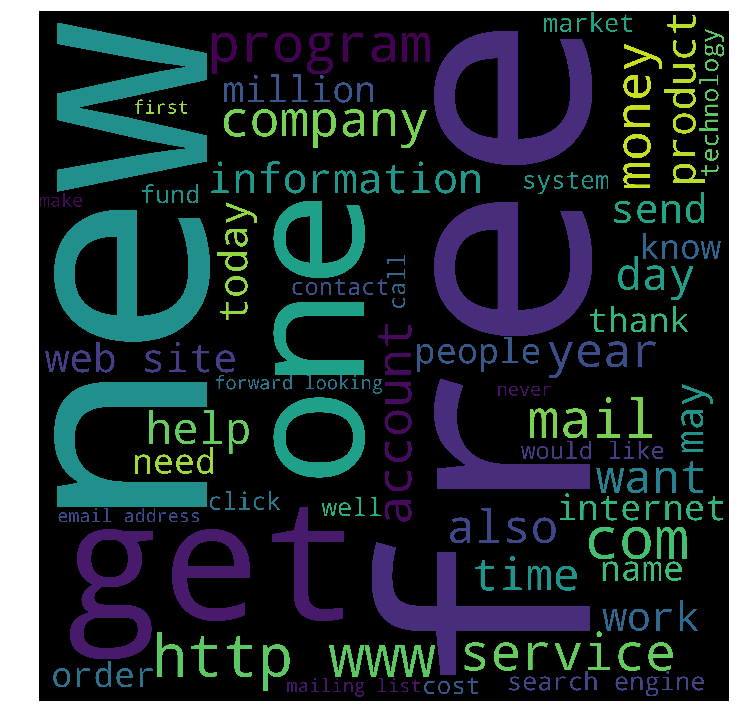

In [14]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

def df2corpus(df):
    corpus = ''
    for x in df:
        corpus += str(x) + '\n'
    return corpus

def buildWordCloud():
    wordcloud = WordCloud(width = 6000, height = 6000, 
                          background_color ='black', stopwords = stop_words, min_font_size = 10, 
                          max_words = 50).generate(df2corpus(data[data['Spam'] == 1]['Text']))
    plt.figure(figsize = (10, 10), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()
    
buildWordCloud()

# Vectorizisation

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
vectorizer = TfidfVectorizer()
vector = vectorizer.fit_transform(data['Text'])

In [17]:
pickle.dump(vectorizer, open('Vectorizer-spam.pickle', 'wb'))

In [18]:
y=data['Spam'].astype('int')

# Machine Learning

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(vector, y, test_size=0.3)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

## Multinomial NB

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

[[2697  368]
 [   1  324]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      3065
           1       0.47      1.00      0.64       325

   micro avg       0.89      0.89      0.89      3390
   macro avg       0.73      0.94      0.79      3390
weighted avg       0.95      0.89      0.91      3390



## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[2688  178]
 [  10  514]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2866
           1       0.74      0.98      0.85       524

   micro avg       0.94      0.94      0.94      3390
   macro avg       0.87      0.96      0.91      3390
weighted avg       0.96      0.94      0.95      3390



## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

[[2622  122]
 [  76  570]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2744
           1       0.82      0.88      0.85       646

   micro avg       0.94      0.94      0.94      3390
   macro avg       0.90      0.92      0.91      3390
weighted avg       0.94      0.94      0.94      3390



## Voting Classifier

In [28]:
from sklearn.ensemble import VotingClassifier

In [29]:
model1 = MultinomialNB()
model2 = LogisticRegression()
model3 = DecisionTreeClassifier()
model = VotingClassifier(estimators=[('mnb', model1), ('lr', model2), ('dtc', model3)])
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[2697  201]
 [   1  491]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2898
           1       0.71      1.00      0.83       492

   micro avg       0.94      0.94      0.94      3390
   macro avg       0.85      0.96      0.90      3390
weighted avg       0.96      0.94      0.94      3390



# Final Model

In [30]:
model1 = MultinomialNB()
model2 = LogisticRegression()
model3 = DecisionTreeClassifier()
classifier = VotingClassifier(estimators=[('mnb', model1), ('lr', model2), ('dtc', model3)])
classifier = classifier.fit(vector, y)

pickle.dump(classifier, open('SpamClassifier.pickle', 'wb'))

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
